# Análisis de Señales y Sistemas | Ingeniería en Electrónica 
![](https://docentesfrmutneduar-my.sharepoint.com/personal/francisco_iglesias_docentes_frm_utn_edu_ar/Documents/ASyS/practica/2021/latex/tp2/logoUTN.jpg)


 # Trabajando con señales en python:
En este notebook vamos a explorar cómo crear señales y analizarlas a través de la transformada de Fourier. El objetivo es obtener un enfoque práctico de los conceptos vistos en la materia, como espectros, el teorema del muestreo y la transformada de Fourier.




Primero hay que importar las librerías necesarias para que el código en este notebook se ejecute correctamente.

In [ ]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 18})

En el siguiente bloque creamos una función **de tiempo discreto** que genera una señal senoidal. Esta función recibe como parámetros **de entrada** a la frecuencia **lineal analógica ($f$)**, amplitud, frecuencia de muestreo y duración en segundos.

In [ ]:
def crear_señal(frecuencia=200, amplitud=0.4, frecuencia_muestreo=8000, dur_sec=0.25):

    t = np.linspace(0, dur_sec,int(np.floor(dur_sec*frecuencia_muestreo)))
    señal = amplitud * np.sin((frecuencia*2*np.pi)*t)
    return señal, frecuencia_muestreo, t

**Ahora creemos una señal seno de prueba, con frecuencia de $5Hz$, amplitud de $0,4$, una frecuencia de muestreo de $150 \frac{muestras}{s}$ y con una duración de un segundo:**

Text(0, 0.5, 'Amplitud')

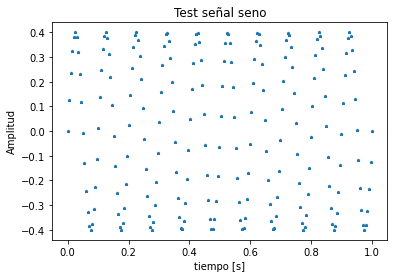

In [ ]:
señal, frecuencia_muestreo, t = crear_señal(frecuencia=10,amplitud=0.4,frecuencia_muestreo=200,dur_sec=1)
plt.plot(t, señal,'*',markersize=3) # Gráfica con muestras
plt.title('Test señal seno')
plt.xlabel('tiempo [s]')
plt.ylabel('Amplitud')

__Aclaración__: **Todas las señales con las que se opera en una computadora son digitales, es decir que están cuantizadas (variable dependiente discreta) y son de tiempo discreto (variable independiente discreta). Sin embargo, para una frecuencia de muestreo alta, es común que se grafiquen utilizando interpolación lineal para que luzcan continuas, como hace por defecto 'plt.plot'.**

Ahora creemos una señal seno de prueba, con frecuencia de $5Hz$, amplitud de $0,4$, una frecuencia de muestreo de $8000 \frac{muestras}{s}$ y con una duración de un segundo:

Text(0, 0.5, 'Amplitud')

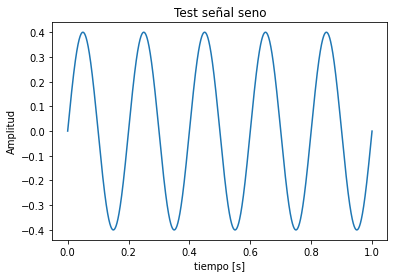

In [ ]:
señal, frecuencia_muestreo, t = crear_señal(frecuencia=5,amplitud=0.4,frecuencia_muestreo=8000,dur_sec=1)
plt.plot(t, señal) # Gráfica con interpolacion lineal o continuo
plt.title('Test señal seno')
plt.xlabel('tiempo [s]')
plt.ylabel('Amplitud')

Ahora creemos una señal con una frecuencia de **$500Hz$** y escuchemos como suena.

In [ ]:
frecuencia = 500
senoidal, fm, t = crear_señal(frecuencia=frecuencia,amplitud=0.4,dur_sec=1.)

In [ ]:
ipd.Audio(senoidal, rate=fm)

Ahora vamos a crear una función que genera ruido:

In [ ]:
def crear_ruido(n_muestras, amplitud=0.025, semilla=None):
    if semilla:
        np.random.seed(semilla)
    ruido = amplitud * np.random.randn(n_muestras)
    return ruido

A continuación le sumamos ruido a la señal senoidal creada anteriormente.

In [ ]:
ruido = crear_ruido(len(senoidal), amplitud=0.04) # la función len(senoidal) indica la cantidad de muestras que tiene la señal
                                                  # esto es para que la señal de ruido tenga la misma cantidad de muestras que la senoidal
                                                  # y se puedan sumar en el domino del tiempo, muestra a muestra.
señal_ruidosa = senoidal + ruido

In [ ]:
ipd.Audio(señal_ruidosa, rate=fm)

Ahora grafiquemos la señal senoidal con ruido:

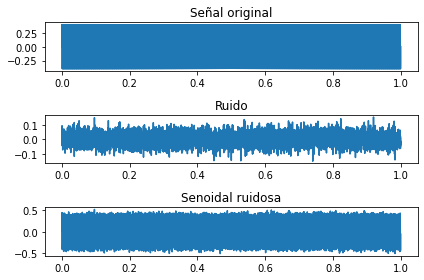

In [ ]:
plt.subplot(311)

plt.plot(t,senoidal)
plt.title('Señal original')
plt.subplot(312)
plt.plot(t,ruido)
plt.title('Ruido')
plt.subplot(313)
plt.plot(t,señal_ruidosa)
plt.title('Senoidal ruidosa')
plt.tight_layout()


Ahora ampliemos el tiempo para ver con más detalle.

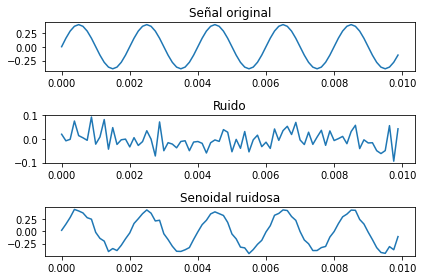

In [ ]:
plt.subplot(311)
muestra_f=int(5*(1/frecuencia)/(1/frecuencia_muestreo))
plt.plot(t[:muestra_f],senoidal[:muestra_f])
plt.title('Señal original')
plt.subplot(312)
plt.plot(t[:muestra_f],ruido[:muestra_f])
plt.title('Ruido')
plt.subplot(313)
plt.plot(t[:muestra_f],señal_ruidosa[:muestra_f])
plt.title('Senoidal ruidosa')
plt.tight_layout()

## Creemos una señal compuesta por varias frecuencias.
Ahora vamos a crear una señal compuesta por dos senoidales de distinta frecuencia:
- Una señal de $300HZ$
- Una señal de $700Hz$

In [ ]:
frec1 = 300
frec2 = 700
señal1, fm, t = crear_señal(frecuencia=frec1,dur_sec=1)
señal2, fm, t = crear_señal(frecuencia=frec2,dur_sec=1)
señal_compuesta = señal1+señal2
print(señal1)

[ 0.00000000e+00  9.33896024e-02  1.81617196e-01 ... -1.81617196e-01
 -9.33896024e-02 -4.07602070e-14]


Escuchemos la señal 1

In [ ]:
ipd.Audio(señal1, rate=fm)

Escuchemos la señal 2

In [ ]:
ipd.Audio(señal2, rate=fm)

Ahora escuchemos la señal compuesta.

In [ ]:
ipd.Audio(señal_compuesta, rate=fm)


Ahora veamos cómo se ve:

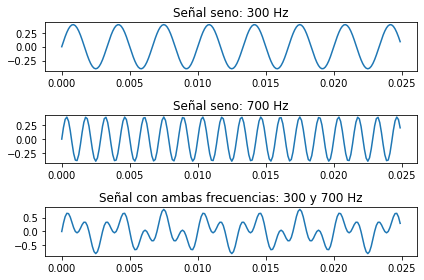

In [ ]:
num_samps = 200
plt.subplot(311)
plt.plot(t[:num_samps],señal1[:num_samps])
plt.title('Señal seno: {} Hz'.format(frec1))
plt.subplot(312)
plt.plot(t[:num_samps],señal2[:num_samps])
plt.title('Señal seno: {} Hz'.format(frec2))
plt.subplot(313)
plt.plot(t[:num_samps],señal_compuesta[:num_samps])
plt.title('Señal con ambas frecuencias: {} y {} Hz'.format(frec1,frec2))
plt.tight_layout()


Ahora le agregamos ruido:

In [ ]:
ruido_señal = crear_ruido(len(señal_compuesta), amplitud=0.2)
señal_compuesta_ruidosa = señal_compuesta + (ruido_señal)

Veamos cómo se ve esta señal cuando lo agregamos ruido:

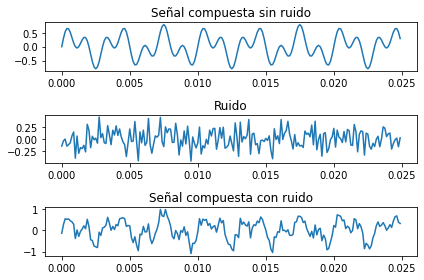

In [ ]:
plt.subplot(3,1,1)
plt.plot(t[:num_samps],señal_compuesta[:num_samps])
plt.title('Señal compuesta sin ruido')
plt.subplot(3,1,2)
plt.plot(t[:num_samps],ruido_señal[:num_samps])
plt.title('Ruido')
plt.subplot(3,1,3)
plt.plot(t[:num_samps],señal_compuesta_ruidosa[:num_samps])
plt.title('Señal compuesta con ruido')
plt.tight_layout()


In [ ]:
ipd.Audio(señal_compuesta_ruidosa, rate=fm)

# Calculemos la Transformada de Fourier!!

Para calcular la transformada discreta de Fourier y su inversa usamos las funciones `fft` y `ifft` respectivamente. La función fft es un algoritmo llamado transformada rápida de Fourier, conocida como FFT por sus siglas en inglés, Fast Fourier Transform. Esta es una manera eficiente de calcular la transformada discreta de Fopurier. Estas funciones estan incluidas en la librería de python llamada `numpy` y en el siguiente bloque de código las vamos a importar:

In [ ]:
from numpy.fft import fft, ifft, fftfreq

Para calcular la transformada de Fourier ejecutamos:

In [ ]:
l=len(señal_compuesta_ruidosa)
señal_ruidosa_fft = fft(señal_ruidosa)/l # Se divide por la cantidad de muestras por cuestiones de cómo funciona el algoritmo de la FFT
señal_compuesta_ruidosa_fft = fft(señal_compuesta_ruidosa)/l # Se divide por la cantidad de muestras por cuestiones de cómo funciona el algoritmo de la FFT

# con las siguientes líneas obtenemos el eje de frecuencias para graficar
freq1 = np.fft.fftfreq(len(señal_compuesta_ruidosa_fft), d=1/frecuencia_muestreo)
freq2 = np.fft.fftfreq(len(señal_compuesta_ruidosa_fft), d=1/frecuencia_muestreo)


## Visualicemos la FFT
Como hemos visto en teoría la transformada discreta de Fourier, existe en el campo de los complejos, para esto revisemos los valores que existen en la variable que guarda la transformada:

In [ ]:
# Miramos las primeras 10 muestras de la transformada de Fourier y vemos que son números complejos
señal_ruidosa_fft[:10]

array([ 8.26624217e-05+0.00000000e+00j, -9.76108833e-08+1.94165588e-04j,
       -8.65134283e-04-1.82443903e-04j,  1.30372248e-04+2.59456845e-04j,
       -2.39670978e-04-2.59187663e-04j,  1.16927409e-04+5.23065800e-04j,
        4.83532907e-04-3.43804448e-04j, -5.30278313e-04-2.93575768e-04j,
       -6.13204905e-07-2.17033942e-04j, -2.47112754e-04-7.09578828e-05j])

Podemos entonces graficar los espectros de amplitud, calculando el valor absoluto de las señales transformadas:

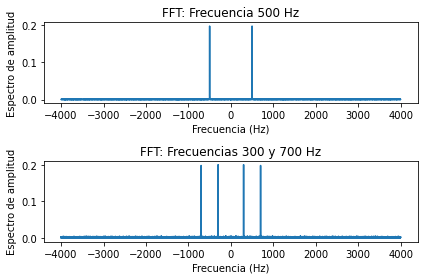

In [ ]:
plt.subplot(2,1,1)
plt.plot(freq1,abs(señal_ruidosa_fft))
plt.title('FFT: Frecuencia {} Hz'.format(frecuencia))
plt.ylabel('Espectro de amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,1,2)
plt.plot(freq2,abs(señal_compuesta_ruidosa_fft))
plt.title('FFT: Frecuencias {} y {} Hz'.format(frec1,frec2))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de amplitud')
plt.tight_layout()

**Modificar las frecuencias (frec1 y frec2) y amplitudes de las señales (Amp1 y Amp2) y del ruido (AmpR). Visualizar el espectro de la señal compuesta ruidosa para los siguientes casos:**

1) frec1=frec2=300 ; Amp1=Amp2=1 ; AmpR=1/10

2)  frec1=300; frec2=700 ; Amp1=1 ; Amp2=3 ; AmpR=1/10

3)  frec1=300; frec2=700 ; Amp1=1 ; Amp2=3 ; AmpR=10


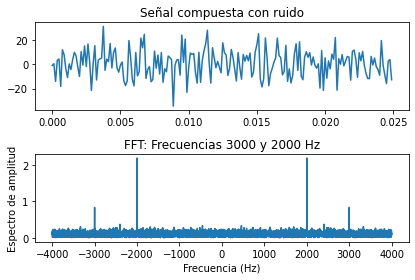

In [ ]:
frec1 = 3000
frec2 = 2000
Amp1= 2
Amp2= 5
AmpR= 10

########
señal1, fm, t = crear_señal(frecuencia=frec1,dur_sec=1, amplitud=Amp1)
señal2, fm, t = crear_señal(frecuencia=frec2,dur_sec=1, amplitud=Amp2)
señal_compuesta = señal1+señal2
ruido_señal = crear_ruido(len(señal_compuesta), amplitud=AmpR)
señal_compuesta_ruidosa = señal_compuesta + ruido_señal
l=len(señal_compuesta_ruidosa)
señal_compuesta_ruidosa_fft = fft(señal_compuesta_ruidosa)/l # Se divide por la cantidad de muestras por cuestiones de cómo funciona el algoritmo de la FFT
freq2 = np.fft.fftfreq(len(señal_compuesta_ruidosa_fft), d=1/frecuencia_muestreo) # eje de freq

plt.subplot(2,1,1)
plt.plot(t[:num_samps],señal_compuesta_ruidosa[:num_samps])
plt.title('Señal compuesta con ruido')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(freq2,abs(señal_compuesta_ruidosa_fft))
#plt.yscale('log')
plt.title('FFT: Frecuencias {} y {} Hz'.format(frec1,frec2))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de amplitud')
plt.tight_layout()
